# Decision Trees

In this lab, we will see how to make a decision tree and forest using Python. First load in the appropriate packages:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
import random
adultTrain = pd.read_csv("adult_training")

Save our response variable, `Income` as y:

In [2]:
y = adultTrain[['Income']]

Use the `list()` function and `.unique()` method to make a list of the two levels (categories) in the `y` column we have created. Call this list `y_names` and print them below.

In [3]:
y_names = list(y.Income.unique())

print(y_names)

['<=50K', '>50K']


We can see that the names are not printed nicely, make a new list of `y_names` with more appropriate names for the levels.

In [4]:
y_names = ['Less than 50,000','More than 50,0000'] 

Create an `X` variable that includes all of the columns except `y`. You can do this using the `.drop('VAR', inplace = False, axis = 1)` method, where `VAR` is the variable you want to drop. The `inplace = False` argument says that we want to create a new data set (rather than overwriting the current one) and the `axis = 1` tells Python to look at the columns (`axis = 0` is the rows).

In [5]:
X = adultTrain.drop('Income', inplace = False, axis = 1)

Turn the categorical variable of `marital_status` in `X` into dummy variables using the `pd.get_dummies()` function: 

In [6]:
X = pd.get_dummies(X)

Get the names of the columns of `X` and save it as `X_names`:

In [7]:
X_names = list(X.columns)

## Test/Training Set Split

We will now split the data into a test and training set. Recall that we do this to later test the accuracy of our model. We can do this with the code below. Note that `train_test_split()` takes an arbitrary number of arguments initially so we can put both our `X` and `y` datasets in. They are split in the *same manner*. 

In [8]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15)

Now we can run the CART algorithm!

This code has various things we must specify. For one, we must specify the type of index we are using (This determine what the definition of "optimal" means in "optimal split".) We have also specified the maximum number of leaf nodes in our data set will be 5 (Thus, there will be at most 5 different buckets the data is classified into). The `fit()` command tells Python to fit the data to (X,y).  

In [9]:
CARTmodel = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 5)

CARTmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

To visualize the decision tree, run the following code:

In [10]:
export_graphviz(CARTmodel, out_file = "cart01.dot")

Running the following code below, you can visualize the decision tree:

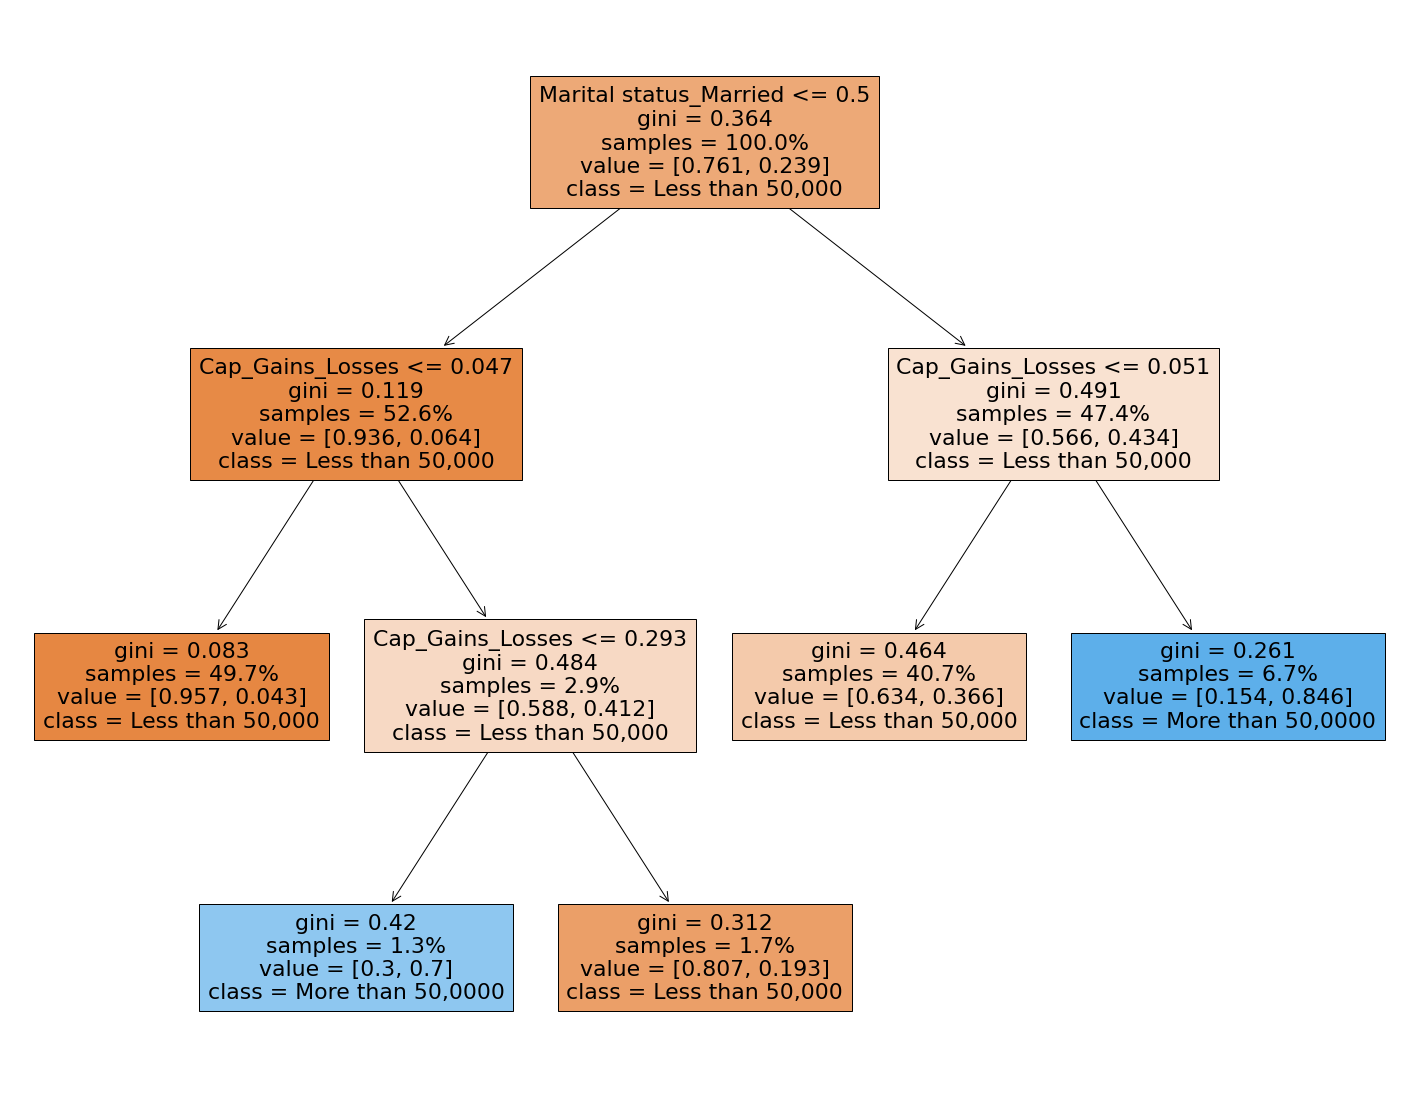

In [11]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(CARTmodel, 
              feature_names = X_names,
              class_names = y_names, 
              filled=True, proportion = True)

To check how accurate the model was, we can use the `predict()` function on the test data `X_test`: 

In [12]:
X_test2 = X_test.copy()

X_test2['Predicted'] = CARTmodel.predict(X_test)

To create the confusion matrix, run the following code:

In [13]:
X_test2['Income'] = y_test

X_test2.groupby(['Predicted','Income']).size().unstack()

Income,<=50K,>50K
Predicted,,
<=50K,2106,506
>50K,33,170


Now, using the same data set, try the same method using the C5.0 method. To do this, change the criterion from "gini" to 'entropy'.

# Your Turn

Now try to build decision trees for the `titanic` data set. 

In [ ]:
titanic = pd.read_csv("titanic.csv")

Split the Python into a test and training set. Make sure the test set has 15% of the data in it.

Next, build a decision tree on your training set and the test your tree using the test data set.